# Projet numérique
*Xavier Sécheresse et Pauline Delarue*

Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de la manière suivante :
\begin{align*}
\dot{x_1}&=x_1(\alpha-\beta x_2)\\ 
\dot{x_2}&=-x_2(\gamma-\delta x_1)
\end{align*}
où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha, \beta, \gamma, \delta $ sont des paramètres strictement positifs.

### Question 1:

Donner une interprétation physique à chaque terme de la dynamique. Montrer qu’il existe deux points d’équilibre (0, 0) et $\bar{x} \in \mathbb{R}_{+}^{*}\times \mathbb{R}_{+}^{*} $. Que peut-on dire de leur stabilité à ce stade ?

Le nombre de proies, représenté par $x_1$, peut varier à cause de deux événements: la reproduction des proies (intrinsèque, non liée aux prédateurs) qui augmente avec $x_1$, et la mort de proies tuées par les prédateurs, qui dépend de $x_1$ mais également de $x_2$. On peut donc associer $\alpha$ au taux de reproduction des proies, et $\beta$ au taux de mortalité des proies due au prédateurs.
Quant au nombre de prédateurs $x_2$, il varie avec: la mort "naturelle" des prédateurs, et la reproduction et naissance de prédateurs dues au nombre de proies mangées. On peut donc associer $\gamma$ au taux de mortalité "naturelle" des prédateurs, et $\delta$ au taux de reproduction des prédateurs dépendant des proies mangées.

Intéressons-nous maintenant aux points d'équilibre de ces équations.

On pose: $f: \mathbb{R}^2 \rightarrow \mathbb{R}^2, (x_1,x_2) \mapsto (x_1(\alpha-\beta x_2), -x_2(\gamma-\delta x_1))$

Le système s'écrit alors: $\dot{x}=f(x)$ avec $x=(x_1,x_2)$

Les points d'équilibre correspondent aux valeurs de $x$ pour lesquelles $f(x)=0$ , soit $(x_1(\alpha-\beta x_2), -x_2(\gamma-\delta x_1))=(0,0)$ . Supposons que $f(x)=0$

Supposons que $x_1 =0$ alors $x_2=0$ et (0,0) est un point d'équilibre du système.

Supposons que $x_1 \neq 0$ alors on a aussi $x_2 \neq 0$ et en divisant par $x_1$ et $x_2$ les deux équations, on trouve que $\bar{x}=(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}) \in \mathbb{R}_+^* \times \mathbb{R}_+^* $ est l'autre point d'équilibre du système.

Etudions la stabilité de ces points fixes en déterminant les valeurs propres de la matrice jacobienne en ces points.

f est continûment différentiable par somme et produit.

$$ J_f(x)= \begin{bmatrix}
\frac{\partial f_1}{\partial x_1}(x) & \frac{\partial f_1}{\partial x_2}(x) \\
\frac{\partial f_2}{\partial x_1}(x) & \frac{\partial f_2}{\partial x_2}(x) \\
\end{bmatrix} = \begin{bmatrix}
\alpha - \beta x_2 & -\beta x_1 \\
\delta x_2 & \delta x_1 -\gamma \\
\end{bmatrix} $$

Donc en (0,0) :

$$ J_f((0,0))= \begin{bmatrix}
\alpha & 0 \\
0 & -\gamma \\
\end{bmatrix}$$

Les valeurs propres de cette matrice sont $\alpha$ et $-\gamma$. Or $\alpha$ et $\gamma$ sont strictement positifs donc $J_f((0,0))$ a une valeur propre à partie réelle strictement positive. Donc (0,0) est instable.

En $\bar{x}=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ :

$$ J_f(\bar{x})=\begin{bmatrix}
0 & -\frac{\beta \gamma}{\delta} \\
\frac{\delta \alpha}{\beta} & 0 \\
\end{bmatrix} $$

On détermine le polynôme caractéristique de $J_f$: $\chi_{J_f}(x) = det(xI_2 - J_f)=x^2 + \alpha \gamma $ .

Les valeurs propres de $J_f(\bar{x})$ sont donc $\pm i\sqrt{\alpha \gamma}$ .
Les parties réelles de ces valeurs propres sont nulles donc on ne peut rien conclure pour l'instant quant à la stabilité de $\bar{x}$ . 

### Question 2:

A l’aide des fonctions meshgrid et quiver, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser streamplot pour visualiser le portrait de phase.


On commence par visualiser le champ de vecteurs, en imposant des valeurs réalistes aux paramètres.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [10, 10]

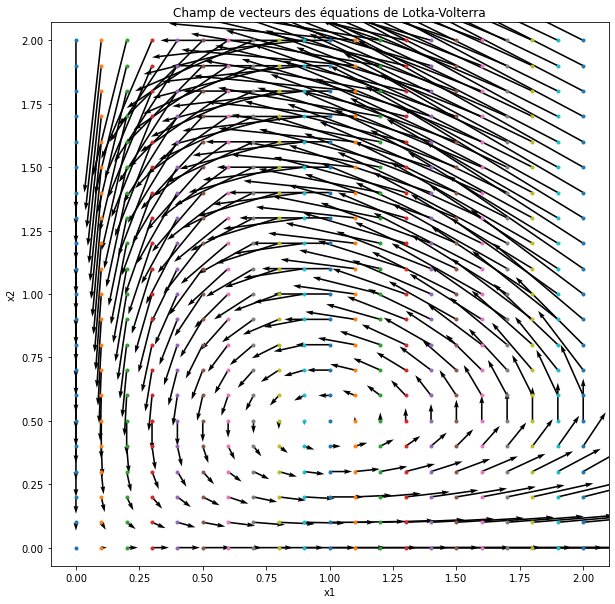

In [3]:
alpha = 2/3
beta = 4/3
gamma = 1
delta = 1

Xvalues = np.linspace(0,2,21)
Yvalues = np.linspace(0,2,21)
X,Y = np.meshgrid(Xvalues,Yvalues)
plt.plot(X,Y,marker = '.',linestyle='none')

U = X*(alpha - beta*Y)
V = -Y*(gamma - delta*X)

plt.axis('equal')
plt.title("Champ de vecteurs des équations de Lotka-Volterra")
plt.xlabel("x1")
plt.ylabel("x2")
plt.quiver(X, Y, U, V, scale=3, units='xy')   #on peut changer l'échelle pour agir sur la densité du champ

plt.show()

On peut donc intuiter le comportement des solutions:

Une solution initialisée sur l'axe des ordonnées (donc pour une population de proies nulle) reste sur l'axe et tend vers (0,0). Une solution initialisée sur l'axe des abscisses (donc pour une population de prédateurs nulle) reste sur l'axe et tend vers l'infini.

Toutes les autres trajectoires de phase possibles semblent circulaires, indiquant une variation périodique de $x_1$ et $x_2$, qui semblent osciller autour d'une valeur d'équilibre: le point (1,0.5) avec les valeurs choisies.

On visualise à présent le portrait de phase à l'aide de streamplot:

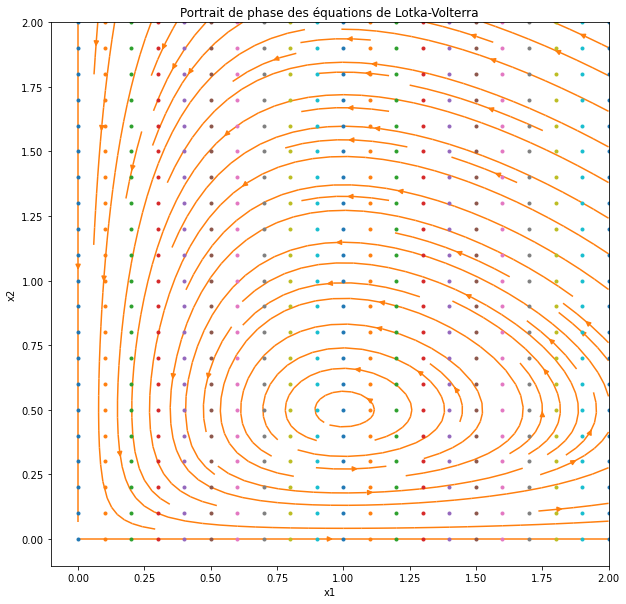

In [4]:
plt.plot(X,Y,marker = '.',linestyle='none')
plt.streamplot(X,Y,U,V,density = 1)
plt.title("Portrait de phase des équations de Lotka-Volterra")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Question 3:

Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}_{+}^{*}\times \mathbb{R}_{+}^{*} $ reste dans $\mathbb{R}_{+}^{*}\times \mathbb{R}_{+}^{*} $ sur son ensemble de définition.

Soit $t_0 \in \mathbb{R}$ et $x_0= (x_{1_0},x_{2_0}) \in \mathbb{R}^*_+ \times \mathbb{R}^*_+ $    
$f: \mathbb{R}^2 \rightarrow \mathbb{R}^2, (x_1,x_2) \mapsto (x_1(\alpha-\beta x_2), -x_2(\gamma-\delta x_1))$ est continûment différentiable.    
Donc par le théorème de Cauchy-Lipschitz, il existe une unique solution maximale $x: I \rightarrow \mathbb{R}^2 $ dans $S_f(t_0,x_0)$

Supposons par l'absurde que la solution initialisée en $(t_0,x_0)$ ne reste pas sur $\mathbb{R}^*_+ \times \mathbb{R}^*_+$ sur son ensemble de définition. Alors $x_1$ ou $x_2$ s'annulent. On suppose que $x_1$ s'annule.    
Alors $\exists t_0' \in I, x_1(t_0')=0$. Le problème de Cauchy défini par $\dot{x} = f(x)$ et $(t_0',x_0')$ avec $x_0'=(0,x_2(t_0'))$ admet une unique solution maximale.    
Or la fonction $t\mapsto (0,x_2(t_0')e^{-(t-t_0')})$ est une telle solution sur $ \mathbb{R} $.    
Par unicité des solutions maximales, on a donc forcément $x_1(t_0)=0$, ce qui est absurde car $x_{1_0} > 0$.    
On effectue le même raisonnement pour le cas où $x_2$ s'annule et non $x_1$.

On en conclut donc que toute solution maximale et a fortiori toute solution initialisée dans $\mathbb{R}_{+}^{*}\times \mathbb{R}_{+}^{*} $ reste dans $\mathbb{R}_{+}^{*}\times \mathbb{R}_{+}^{*} $ sur son ensemble de définition.

### Question 4:

On considère la fonction:

$$ H(x_1,x_2)= \delta x_1-\gamma\ln(x_1)+\beta x_2-\alpha\ln(x_2) $$

définie sur $\mathbb{R}_{+}^{*}\times \mathbb{R}_{+}^{*} $. Calculer la dérivée de H le long des solutions initialisées dans $\mathbb{R}_{+}^{*}\times \mathbb{R}_{+}^{*} $. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{+}^{*}\times \mathbb{R}_{+}^{*} $ est définie sur $\mathbb{R}$.

$H:\mathbb{R}^*_+ \times \mathbb{R}^*_+ \rightarrow \mathbb{R}$ est continûment différentiable par composition et somme. Calculons $\frac{d}{dt} H(x)$ où $x:t \in \mathbb{R} \mapsto (x_1(t),x_2(t)) \in \mathbb{R}^*_+ \times \mathbb{R}^*_+ $ le long d'une trajectoire $t\mapsto x(t)$ de l'équation différentielle $\dot{x} = f(x)$.     
Soit $t \in \mathbb{R}$.

$$\frac{d}{dt} H(x(t)) = \langle \nabla H(x(t)),\dot{x}(t) \rangle = \langle \nabla H(x(t)),f(x(t)) \rangle $$

Or: $$\nabla H(x(t)) = \begin{bmatrix}
\frac{\partial{H}}{\partial{x_1}} \\
\frac{\partial{H}}{\partial{x_2}} \\
\end{bmatrix} = \begin{bmatrix}
\delta - \frac{\gamma}{x_1} \\
\beta - \frac{\alpha}{x_2} \\
\end{bmatrix} $$

Et: $$f(x) = \begin{bmatrix}
x_1(\alpha-\beta x_2) \\
-x_2(\gamma-\delta x_1) \\
\end{bmatrix}$$

D'où: $$\begin{align*}
\langle \nabla H(x(t)),f(x(t)) \rangle &= (\delta - \frac{\gamma}{x_1})x_1(\alpha-\beta x_2) - x_2(\gamma-\delta x_1)(\beta - \frac{\alpha}{x_2}) \\
&= (\delta x_1 - \gamma)(\alpha-\beta x_2) - (\beta x_2 - \alpha)(\gamma-\delta x_1) \\
&= 0 
\end{align*}$$

Donc $\frac{d}{dt} H(x)=0 $, donc $H(x)$ est constante sur $\mathbb{R}$.    
Cela signifie que H est conservée le long d'une trajectoire.

Donc si $x$ est une solution maximale initialisée dans $\mathbb{R}^*_+ \times \mathbb{R}^*_+ $ alors $x$ est définie sur $\mathbb{R}_+ $ au moins et $H(x)$ est constante sur cet ensemble. De plus on a que $H(x)$ est constante sur $\mathbb{R}$ donc $H$ y est bien définie et donc $x_1$ et $x_2$ sont à valeurs dans $\mathbb{R}_+^*$.    
Cela montre bien que la solution maximale considérée est définie sur $\mathbb{R}$.

### Question 5:

Représenter les courbes de niveau de H . Où se trouve $\bar{x}$? Qu’en conclut-on sur le comportement des solutions ? En déduire (graphiquement) que $\bar{x}$ est stable, au sens de la définition de stabilité.

On commence par représenter les courbes de niveau de $H$:

<ipython-input-7-45534787ca2f>:1: RuntimeWarning: divide by zero encountered in log
  H = delta*X - gamma*np.log(X) + beta*Y - alpha*np.log(Y)


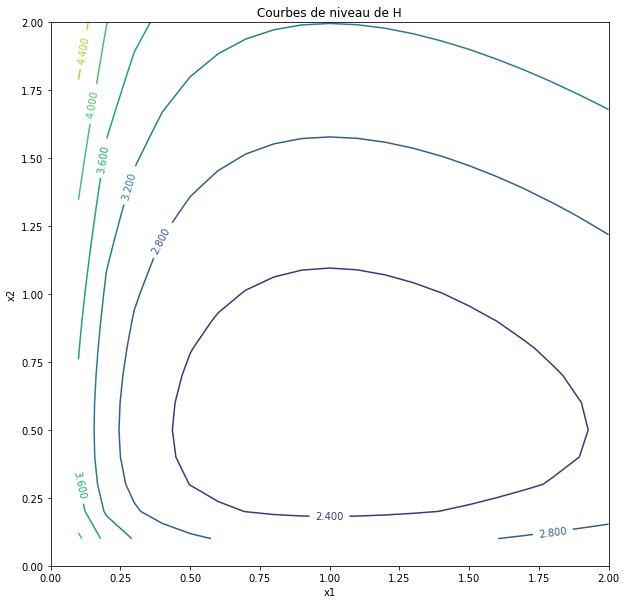

In [7]:
H = delta*X - gamma*np.log(X) + beta*Y - alpha*np.log(Y)

contours = plt.contour(X, Y, H)
plt.clabel(contours, inline=1, fontsize=10)
plt.title("Courbes de niveau de H")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

On a que $\bar{x}$ se situe au "centre" des lignes de niveau sur le graphique précédent. On peut en déduire que les solutions oscillent autour de la position d'équilibre. 
On peut également en déduire que $\bar{x}$ est une position d'équilibre stable du système car on a graphiquement un minimum local de $H$.

On souhaite maintenant simuler numériquement les trajectoires.

### Question 6:

Coder une fonction du type 

In [113]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    ...
    return t, x

prenant en entrée une fonction $ f : \mathbb{R} \times \mathbb{R}^n \rightarrow \mathbb{R}^n $ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d’Euler explicite appliqué à $ \dot{x} = f(t,x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

On commence par coder la fonction solve_euler_explicit.

In [5]:
def solve_euler_explicit(f,x0,dt,t0,tf):
    n = math.floor((tf-t0)/dt) +1
    t,x = np.zeros(n),np.zeros((n,x0.shape[0]))
    t[0],x[0] = t0,x0
    for i in range (1,n):
        x[i] = x[i-1] + dt*f(t[i-1],x[i-1])
        t[i] = t[i-1] + dt
    return t,x

Testons à présent cette fonction sur l'équation différentielle suivante: $x'=-2x$, dont les solutions sont $\{t\mapsto Ke^{-2t}; K \in \mathbb{R}\}$ .

La fonction prise en argument par solve_euler_explicit est donc $f:\mathbb{R} \times \mathbb{R} \rightarrow \mathbb{R}, (t,x) \mapsto -2x $

On va prendre: $\begin{align*}
x^0 &= 1 \\
t^0 &= 0 \\
t^f &= 2 \\
dt &= 0.1 \end{align*}$

On trace la solution obtenue par Euler ainsi que la solution exacte.

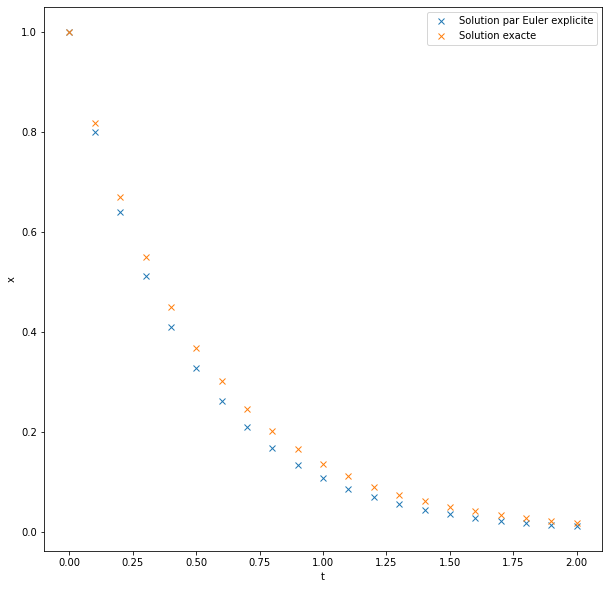

In [6]:
def test(t,x):
    return -2*x

def sol_exacte(x0,dt,t0,tf):
    n = math.floor((tf-t0)/dt) +1
    t,x = np.zeros(n),np.zeros((n,x0.shape[0]))
    t[0],x[0] = t0,x0
    for i in range (1,n):
        t[i] = t[i-1] + dt
        x[i] = x0*math.exp(-2*(t[i]-t0))
    return t,x

x0=np.array([1])
dt=0.1
t0=0
tf=2 

plt.plot(solve_euler_explicit(test,x0,dt,t0,tf)[0],solve_euler_explicit(test,x0,dt,t0,tf)[1],'x',label='Solution par Euler explicite')
plt.plot(sol_exacte(x0,dt,t0,tf)[0],sol_exacte(x0,dt,t0,tf)[1],'x',label='Solution exacte')
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

On va maintenant tracer l'erreur entre la solution par Euler et la solution théorique en fonction du pas de temps. Cela nous permettra de vérifier la convergence du schéma quand $dt$ tend vers 0, et de déterminer l'ordre de convergence.

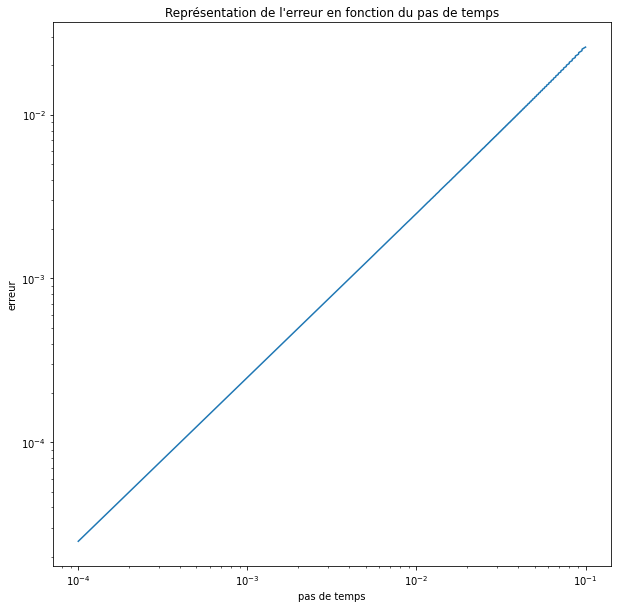

In [10]:
def erreur(f,x0,t0,tf):
    T = np.linspace(0.0001,0.1,1000)
    E = np.zeros(len(T))
    for i in range (len(T)):
        temps = solve_euler_explicit(f,x0,T[i],t0,tf)[0]
        erreur = (solve_euler_explicit(f,x0,T[i],t0,tf)[1]-sol_exacte(x0,T[i],t0,tf)[1])
        N = len(temps)
        E[i] = (np.linalg.norm(erreur))/np.sqrt(N)
    return T,E

x0=np.array([1])
t0=0
tf=2

plt.loglog(erreur(test,x0,t0,tf)[0],erreur(test,x0,t0,tf)[1])
plt.title("Représentation de l'erreur en fonction du pas de temps")
plt.xlabel("pas de temps")
plt.ylabel("erreur")
plt.show()

Ainsi, quand $dt$ tend vers 0, l'erreur tend vers 0 également.

De plus, on peut déterminer l'ordre de convergence en déterminant la pente de la droite tracée:

In [11]:
T = np.log(erreur(test,x0,t0,tf)[0])
E = np.log(erreur(test,x0,t0,tf)[1])
print (np.polyfit(T,E,1))

[ 1.01323572 -1.32413608]


En approximant la droite tracée par la représentation d'un polynôme d'ordre 1 à l'aide de polyfit, on trouve un coefficient directeur de 1, qui correspond donc à un ordre de convergence de 1.

### Question 7:

Utiliser le schéma d’Euler explicite pour simuler les équations de Lotka-Volterra. Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité? On pourra tracer l’évolution de la fonction $H$.


In [12]:
def lotka(t,x):
    return np.array([x[0]*(alpha - beta*x[1]), -x[1]*(gamma - delta*x[0])])

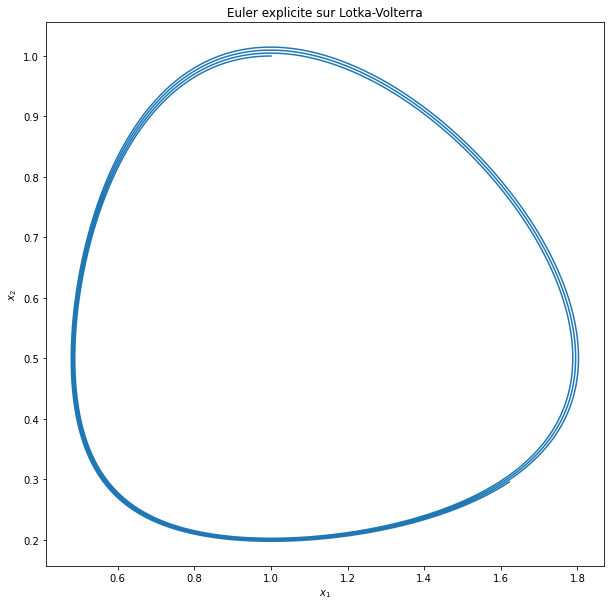

In [23]:
x0=np.array([1,1])
dt=0.003
t0=0
tf=30

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Euler explicite sur Lotka-Volterra')
plt.plot(solve_euler_explicit(lotka,x0,dt,t0,tf)[1][:,0],solve_euler_explicit(lotka,x0,dt,t0,tf)[1][:,1])
plt.show()

Traçons maintenant l'évolution de la fonction $H$.

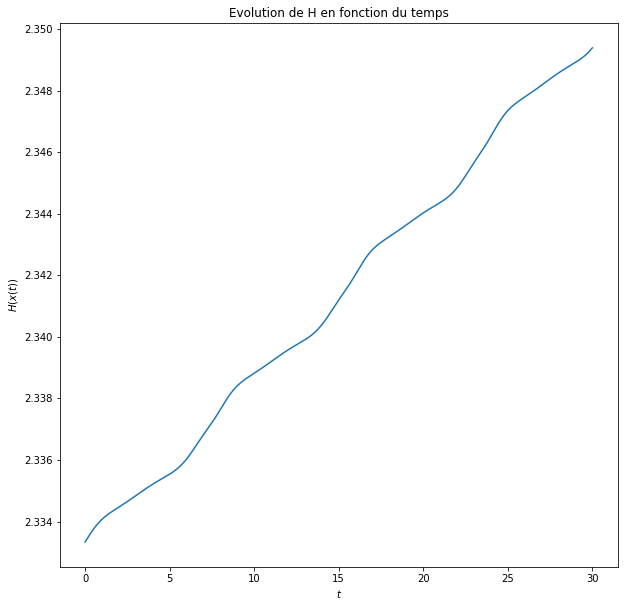

In [19]:
X = solve_euler_explicit(lotka,x0,dt,t0,tf)[1][:,0]
Y = solve_euler_explicit(lotka,x0,dt,t0,tf)[1][:,1]

T = solve_euler_explicit(lotka,x0,dt,t0,tf)[0]
H = delta*X - gamma*np.log(X) + beta*Y - alpha*np.log(Y)

plt.xlabel('$t$')
plt.ylabel('$H(x(t))$')
plt.title('Evolution de H en fonction du temps')
plt.plot(T,H)
plt.show()

On constate qu'en temps long, la trajectoire calculée via Euler explicite diverge lentement, alors qu'elle est censée suivre la courbe de niveau de $H$.    
Sur le graphe de l'évolution de $H$, on constate que $H$ augmente lentement, ce qui n'est pas logique puisqu'elle est censée rester constante le long de n'importe quelle trajectoire.

### Question 8: 

Coder maintenant une fonction du type:

In [121]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    ...
    return t, x

donnant la solution d’un schéma d’Euler implicite appliqué à $\dot{x} = f (t, x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?

In [20]:
def solve_euler_implicit(f,x0,dt,t0,tf,itermax=100):
    n = math.floor((tf-t0)/dt) +1
    t,x = np.zeros(n),np.zeros((n,x0.shape[0]))
    t[0],x[0] = t0,x0
    for i in range (1,n):
        t[i] = t[i-1] + dt
        x_z = x[i-1] + dt*f(t[i-1],x[i-1])     #x_z reste fixe dans la boucle while, il sert à calculer diff
        x_zero = x[i-1] + dt*f(t[i-1],x[i-1])     # on initialise x_zero avec la valeur trouvée par Euler explicite
        x_un = x_zero + dt*f(t[i],x_zero)
        iternb = 0
        diff = np.linalg.norm(x_un-x_zero)/np.linalg.norm(x_z)
        while ((iternb < itermax) and (diff > 0.001)):
            x_un = x[i-1] + dt*f(t[i],x_zero)
            iternb = iternb + 1
            diff = np.linalg.norm(x_un-x_zero)/np.linalg.norm(x_z)
            x_zero = np.copy(x_un)
        x[i] = x_zero
    return t,x

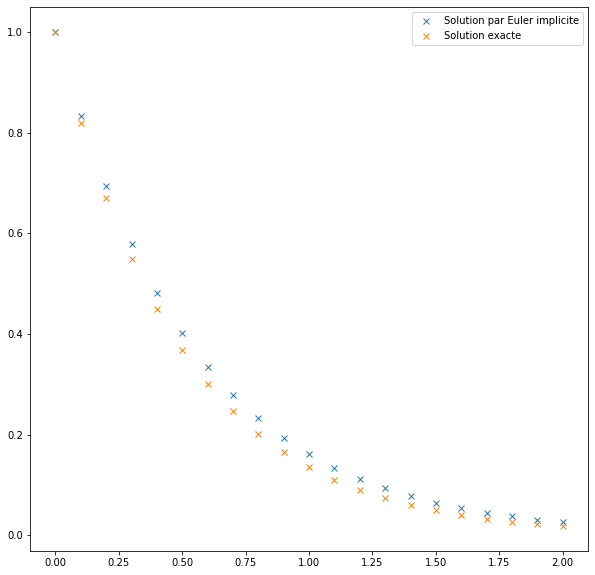

In [21]:
# Sur une solution connue:
x0=np.array([1])
dt=0.1
t0=0
tf=2

plt.plot(solve_euler_implicit(test,x0,dt,t0,tf)[0],solve_euler_implicit(test,x0,dt,t0,tf)[1],'x',label='Solution par Euler implicite')
plt.plot(sol_exacte(x0,dt,t0,tf)[0],sol_exacte(x0,dt,t0,tf)[1],'x',label='Solution exacte')
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

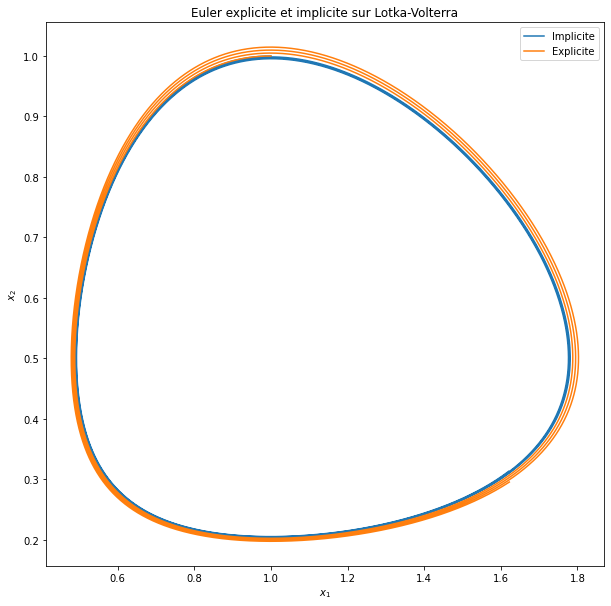

In [24]:
# Sur Lotka-Volterra:

x0=np.array([1,1])
dt=0.003
t0=0
tf=30

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Euler explicite et implicite sur Lotka-Volterra')
plt.plot(solve_euler_implicit(lotka,x0,dt,t0,tf,itermax=100)[1][:,0],solve_euler_implicit(lotka,x0,dt,t0,tf,itermax=100)[1][:,1],label='Implicite')
plt.plot(solve_euler_explicit(lotka,x0,dt,t0,tf)[1][:,0],solve_euler_explicit(lotka,x0,dt,t0,tf)[1][:,1],label='Explicite')
plt.legend()
plt.show()

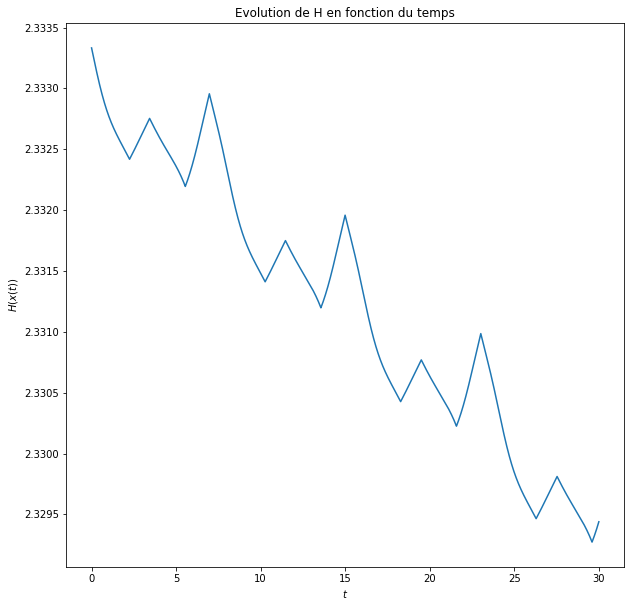

In [25]:
# Tracé de H:

X = solve_euler_implicit(lotka,x0,dt,t0,tf)[1][:,0]
Y = solve_euler_implicit(lotka,x0,dt,t0,tf)[1][:,1]

T = solve_euler_implicit(lotka,x0,dt,t0,tf)[0]
H = delta*X - gamma*np.log(X) + beta*Y - alpha*np.log(Y)

plt.xlabel('$t$')
plt.ylabel('$H(x(t))$')
plt.title('Evolution de H en fonction du temps')
plt.plot(T,H)
plt.show()

On constate que par rapport au Euler explicite, l'Euler implicite converge plus que l'Euler explicite. 
 
Sur le graphe de l'évolution de $H$, on constate que H diminue, mais plus lentement qu'avec la fonction explicite.

### Question 9:

Expliquer pourquoi les solutions de:

$$ \begin{align*}
\dot{x_1} &= x_1 (\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0) \\
\dot{x_2} &= -x_2(\gamma - \delta x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0) \end{align*} $$

sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout
choix de $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ continûment différentiable.

D'après la question 4, $H$ se conserve le long d'une trajectoire. Donc $\forall t \in \mathbb{R}_+, H(x(t)) = H(x(0))$ et donc si $H(x(0)) = H_0$ alors $H(x_1,x_2) - H_0 =0$ et les deux termes supplémentaires de ce nouveau système par rapport au système précédent s'annulent. Donc les solutions d'un système sont aussi solutions de l'autre.

### Question 10:

Soit $H_0 \in \mathbb{R}$. Calculer la dérivée de $ H-H_0 $ le long des solutions de ce
nouveau système. Montrer que l’on peut choisir u tel que:

$$ \frac{d}{dt} (H(x(t)) - H_0) = -k \| \nabla H(x(t)) \|^2(H(x(t)) -H_0) $$

En déduire qu’alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque
$t$ tend vers l’infini si $x$ reste à une distance strictement positive de $\bar{x}$.

Soit $H_0 \in \mathbb{R}$ .

$H-H_0:\mathbb{R}^*_+ \times \mathbb{R}^*_+ \rightarrow \mathbb{R}$ est continûment différentiable. Calculons $\frac{d}{dt} (H(x(t))-H_0)$ où $x(t)=(x_1(t),x_2(t)) \in \mathbb{R}^*_+ \times \mathbb{R}^*_+ $ le long d'une trajectoire $t\mapsto x(t)$ de l'équation différentielle $\dot{x} = g(x)$ où:

$$g: \mathbb{R}^2 \rightarrow \mathbb{R}^2, (x_1,x_2) \mapsto (x_1(\alpha-\beta x_2)- u_1(x_1,x_2)(H(x_1,x_2)-H_0), -x_2(\gamma-\delta x_1)- u_2(x_1,x_2)(H(x_1,x_2)-H_0))$$

$$\frac{d}{dt} (H(x(t))-H_0) = \frac{d}{dt} (H(x(t)) = \langle \nabla H(x(t)),\dot{x}(t) \rangle = \langle \nabla H(x(t)),g(x(t)) \rangle $$

Or: $$\nabla H(x(t)) = \begin{bmatrix}
\frac{\partial{H}}{\partial{x_1}} \\
\frac{\partial{H}}{\partial{x_2}} \\
\end{bmatrix} = \begin{bmatrix}
\delta - \frac{\gamma}{x_1} \\
\beta - \frac{\alpha}{x_2} \\
\end{bmatrix} $$

Et: $$g(x) = \begin{bmatrix}
x_1(\alpha-\beta x_2)- u_1(x_1,x_2)(H(x_1,x_2)-H_0) \\
-x_2(\gamma-\delta x_1)- u_2(x_1,x_2)(H(x_1,x_2)-H_0) \\
\end{bmatrix}$$

D'où: $$\begin{align*}
\langle \nabla H(x(t)),g(x(t)) \rangle &= (\delta - \frac{\gamma}{x_1})(x_1(\alpha-\beta x_2)- u_1(x_1,x_2)(H(x_1,x_2)-H_0)) - (x_2(\gamma-\delta x_1)- u_2(x_1,x_2)(H(x_1,x_2)-H_0))(\beta - \frac{\alpha}{x_2}) \\
&= (\delta x_1 - \gamma)(\alpha-\beta x_2) - (\delta - \frac{\gamma}{x_1})u_1(x_1,x_2)(H(x_1,x_2)-H_0) - (\beta x_2 - \alpha)(\gamma-\delta x_1) + u_2(x_1,x_2)(H(x_1,x_2)-H_0)(\beta - \frac{\alpha}{x_2}) \\
&= u_2(x_1,x_2)(H(x_1,x_2)-H_0)(\beta - \frac{\alpha}{x_2})- (\delta - \frac{\gamma}{x_1})u_1(x_1,x_2)(H(x_1,x_2)-H_0) \end{align*}$$ d'après les calculs de la question 4.

Si on définit $$u:\mathbb{R}^2 \rightarrow \mathbb{R}^2, (x_1,x_2) \mapsto (k(\delta - \frac{\gamma}{x_1}),k(\frac{\alpha}{x_2} - \beta))$$ avec $k$ strictement positif. On a bien $u$ définie car $x_1$ et $x_2$ sont non nuls sur les ensembles considérés.

Alors u est continûment différentiable.

Et: $$ \frac{d}{dt} (H(x(t)) - H_0) = -k[(\beta - \frac{\alpha}{x_2})^2 + (\delta - \frac{\gamma}{x_1})^2](H(x(t)) -H_0) = -k \| \nabla H(x(t)) \|^2(H(x(t)) -H_0) $$

Tant que $\| \nabla H(x(t)) \|^2 > 0$, c'est-à-dire tant que $x$ reste à une distance strictement positive du point $\bar{x} = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$, $\exists s \in \mathbb{R}_+^*, \forall t, \| \nabla H(x(t)) \|^2 \geqslant s $

Donc $\frac{d}{dt} (H(x(t)) - H_0) \leq -ks(H(x(t)) - H_0)$

En résolvant cette inégalité, on obtient que $H(x(t)) - H_0 \leq e^{-kst}$.

$H(x(t))$ converge bien exponentiellement vers $H_0$ quand $t$ tend vers l'infini.

### Question 11:

En déduire comment modifier l’implémentation du schéma d’Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ? On pourra exprimer $H(x^{j+1})-H(x_0)$ en fonction de $H(x^j)-H(x_0)$ au premier ordre en $dt$.

On modifie le schéma d'Euler en remplaçant la fonction $f$ par la fonction $g$, en choisissant $u$ comme on l'a posée dans la question précédente.        
Les termes en $H-H_0$ convergent alors exponentiellement vers 0 donc $H$ est stabilisée. Cette convergence dépend de $k$: plus $k$ est grand, plus la convergence sera rapide d'après l'expression trouvée à la question 10. 

Cependant, $k$ ne peut pas être choisi arbitrairement grand. En effet:
$$\begin{align*}
H(x^{j+1})-H(x_0) &= H(x^j)-H(x_0) + dt\frac{d}{dt}(H(x^j)-H_0) + o(dt) \\
&= H(x^j)-H(x_0) - kdt\| \nabla H(x^j) \|^2(H(x^j) -H_0) + o(dt) \\
&= (H(x^j)-H(x_0)) (1-kdt\| \nabla H(x^j)\|^2)
\end{align*}$$

$H(x)-H(x_0)$ tend vers 0 exponentiellement donc a un signe constant, donc $1-kdt\| \nabla H(x)\|^2 > 0$.    
Donc $kdt\| \nabla H(x)\|^2 < 1$ et $k< \frac{\| \nabla H(x)\|^2}{dt}$.

Donc $k$ ne peut pas être choisi arbitrairement grand, sinon le signe de la différence change à chaque itération.